<div style="text-align :center;">
    <h1> <b> Modul VI </b> </h1>
    <h1> <b> Finger Simulation Experiment 4</b> </h1>
    <h3> (Rizki Rahman Maulana) </h3>
</div>

## **Import Libary yang Diperlukan**

In [1]:
import cv2 as cv
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

Mengimpor beberapa library seperti `OpenCV (cv2)` untuk pengolahan citra, `NumPy (np)` untuk operasi matematika, `Pandas (pd)` untuk analisis data, `Matplotlib (plt)` untuk visualisasi data, serta modul `os` dan `csv` untuk operasi file.

## **Data Understanding**

#### **Jumlah Data**

Dalam proyek ini, kami menggunakan dataset yang terdiri dari gambar sidik jari. Total jumlah data yang digunakan adalah 2000 gambar, dengan distribusi yang merata di lima kategori berbeda. Setiap kategori memiliki 400 gambar. Kategori tersebut diidentifikasi berdasarkan jari tangan yang berbeda: jari1, jari2, jari3, jari4, dan jari5.

#### **Jumlah Kelas**

Dataset ini terbagi menjadi lima kelas, yang masing-masing mewakili jumlah jari tangan:

- jari1
- jari2
- jari3
- jari4
- jari5

#### **Cara Mendapatkan Data**

Data sidik jari ini disimpan dalam struktur direktori yang berisi subdirektori untuk setiap jari. Setiap subdirektori berisi lebih dari 400 gambar sidik jari yang berkaitan dengan jari tersebut. Proses memuat data dilakukan dengan membaca gambar dari setiap subdirektori, mengubah ukurannya menjadi ukuran yang seragam, dan menyimpan gambar-gambar tersebut beserta label yang sesuai (nama subdirektori).

Berikut adalah langkah-langkah detail yang kami lakukan untuk mendapatkan dan memproses data:

##### 1. Memuat Gambar dan Label

Kami membuat fungsi `load_images_with_labels` yang memuat gambar dari subdirektori yang berbeda. Fungsi ini membaca setiap gambar dalam mode grayscale, mengubah ukurannya menjadi 150x150 piksel, dan menyimpan gambar-gambar tersebut dalam array data serta label yang sesuai dalam array labels.

In [2]:
def load_images_with_labels(base_folder, target_size=(150, 150)):
    data = []
    labels = []
    filenames = []
    fingers = ['finger_1', 'finger_2', 'finger_3', 'finger_4', 'finger_5']
    
    for finger in fingers:
        folder_path = os.path.join(base_folder, finger)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv.resize(img, target_size)
                data.append(img_resized)
                labels.append(finger)
                filenames.append(filename)
    
    return np.array(data), np.array(labels), filenames


base_folder = 'finger'
data, labels, filenames = load_images_with_labels(base_folder, target_size=(150, 150))

Fungsi `load_images_with_labels` bertujuan untuk memuat gambar dari beberapa folder yang berbeda, mengubah ukuran gambar tersebut, dan mengembalikan dua array: satu untuk data gambar (`data`) dan satu lagi untuk label yang terkait dengan gambar tersebut (`labels`).

##### 2. Eksplorasi Data

Setelah memuat data, kami melakukan eksplorasi data untuk memahami karakteristik dataset. Ini termasuk menghitung jumlah total data dan distribusi per kategori, serta menganalisis karakteristik gambar seperti background, noise, dan pencahayaan.

In [27]:
# Menghitung jumlah total data dan distribusinya di setiap kategori
def data_distribution(labels):
    distribution = pd.Series(labels).value_counts()
    return distribution

# Mendapatkan distribusi data
distribution = data_distribution(labels)
print('Jumlah total data: ', len(labels))
print('Distribusi data per kategori:\n', distribution)

Jumlah total data:  2099
Distribusi data per kategori:
 finger_1    422
finger_4    420
finger_2    419
finger_3    419
finger_5    419
Name: count, dtype: int64


Kode diatas memuat sebuah fungsi `data_distribution(labels)` yang menerima sebuah daftar label dan mengembalikan distribusi label tersebut dalam bentuk `Pandas Series`, yang menghitung jumlah kemunculan setiap label. Fungsi tersebut kemudian dipanggil dengan daftar label yang diberikan untuk menghasilkan distribusi data. Hasilnya dicetak dengan menampilkan jumlah total data dalam daftar label, diikuti dengan distribusi data per kategori yang ditampilkan dalam bentuk `Pandas Series`.

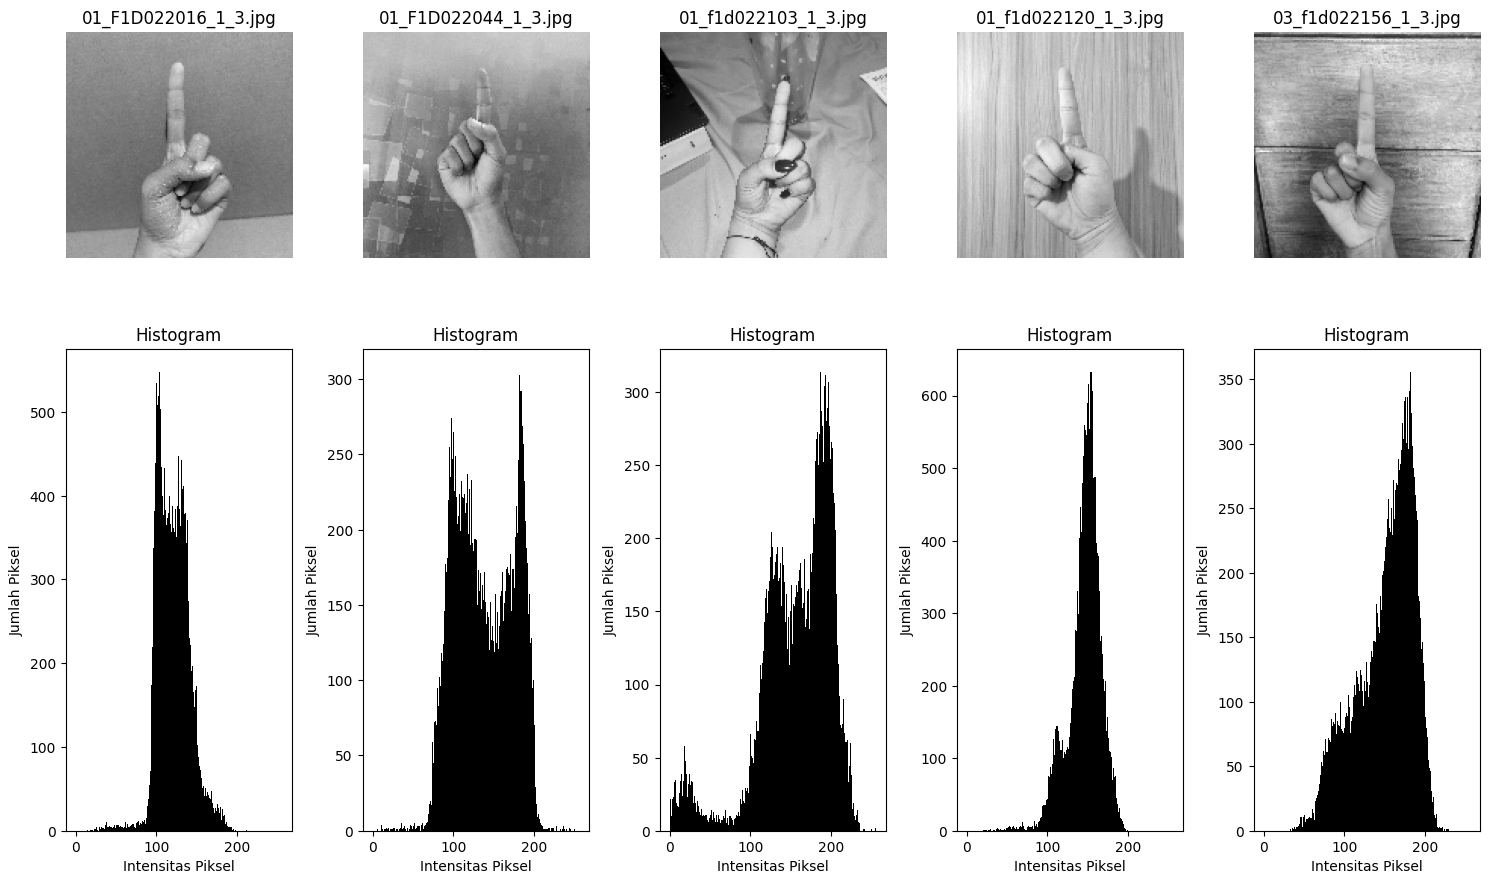

In [5]:
def plot_samples_and_histograms(data, filenames, sample_indices=[4, 7, 13, 16, 67]):
    num_samples = len(sample_indices)
    plt.figure(figsize=(15, 10))  
    
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(data[idx], cmap='gray')
        plt.title(filenames[idx])
        plt.axis('off')
        
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.hist(data[idx].ravel(), bins=256, range=[0, 256], color='black')
        plt.title('Histogram')
        plt.xlabel('Intensitas Piksel')
        plt.ylabel('Jumlah Piksel')
    
    plt.tight_layout()
    plt.show()

plot_samples_and_histograms(data, filenames)

#### 3. Visualisasi Distribusi Data

Fungsi `plot_data_distribution` dirancang untuk menampilkan distribusi data dalam bentuk diagram batang (bar chart). Fungsi ini menerima parameter `distribution`, yang merupakan seri pandas yang berisi jumlah data untuk setiap kategori. Dengan menggunakan metode `plot` dari `pandas` untuk membuat diagram batang, fungsi ini menambahkan judul, serta label sumbu x dan y untuk memberikan konteks yang jelas. 

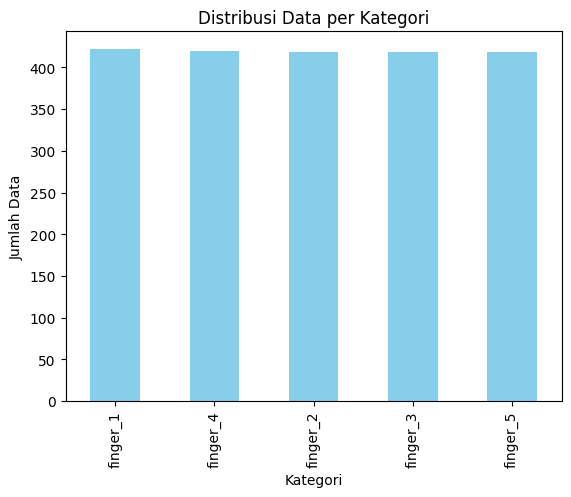

In [6]:
def plot_data_distribution(distribution):
    distribution.plot(kind='bar', color='skyblue')
    plt.title('Distribusi Data per Kategori')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah Data')
    plt.show()

plot_data_distribution(distribution)


## **Data Preparation**

Data preparation adalah tahap penting dalam pemrosesan data untuk proyek pembelajaran mesin atau visi komputer, khususnya dalam pengenalan gambar. Tahap ini mencakup berbagai langkah untuk memastikan bahwa data siap digunakan oleh model. Berikut adalah tahapan-tahapan dalam data preparation:

### **Image Augmentation**

Image augmentation adalah proses untuk memperluas dataset dengan membuat variasi baru dari gambar yang ada.

Teknik yang akan digunakan adalah rotasi dengan sudut 90, 180, dan 270 derajat. Rotasi gambar dapat membantu dalam mengatasi masalah keseragaman arah pada dataset yang mungkin mempengaruhi performa model dan overfitting.

In [7]:
def rotate_image(image, angle):
    if angle not in [90, 180, 270]:
        raise ValueError("Hanya sudut 90, 180 dan 270 derajat")
    
    rows = len(image)
    cols = len(image[0])
    
    def rotate_90(image):
        rotated = []
        for col in range(cols):
            new_row = []
            for row in reversed(range(rows)):
                new_row.append(image[row][col])
            rotated.append(new_row)
        return rotated
    
    def rotate_180(image):
        rotated = []
        for row in reversed(range(rows)):
            new_row = []
            for col in reversed(range(cols)):
                new_row.append(image[row][col])
            rotated.append(new_row)
        return rotated
    
    def rotate_270(image):
        rotated = []
        for col in reversed(range(cols)):
            new_row = []
            for row in range(rows):
                new_row.append(image[row][col])
            rotated.append(new_row)
        return rotated
    
    if angle == 90:
        return rotate_90(image)
    elif angle == 180:
        return rotate_180(image)
    elif angle == 270:
        return rotate_270(image)

Fungsi `rotate_image` menerima `image` (dalam bentuk matriks 2D) dan `angle` (90, 180, atau 270 derajat) sebagai input, dan mengembalikan gambar yang sudah diputar sesuai dengan sudut yang ditentukan. Pertama, fungsi melakukan pemeriksaan untuk memastikan bahwa sudut rotasi yang dimasukkan adalah 90, 180, atau 270 derajat. Jika tidak, fungsi akan memunculkan pengecualian ValueError untuk memberi tahu pengguna bahwa hanya sudut-sudut ini yang dapat diterima. Fungsi kemudian mengambil panjang dan lebar gambar (matriks) yang akan diputar, karena kita akan membutuhkan informasi ini dalam proses rotasi. Ada tiga fungsi rotasi yang terpisah untuk setiap sudut rotasi (90, 180, dan 270 derajat). Setiap fungsi melakukan operasi rotasi yang sesuai tergantung pada sudut yang dimasukkan. Berdasarkan sudut rotasi yang dimasukkan, fungsi akan memilih fungsi rotasi yang sesuai untuk dieksekusi. Fungsi akan mengembalikan gambar yang sudah diputar sesuai dengan sudut yang dimasukkan oleh pengguna.

In [8]:
augmented_data = []
augmented_labels = []

for img, label in zip(data, labels):
    augmented_data.append(img)
    augmented_labels.append(label)
    
    rotated_90 = rotate_image(img, 90)
    augmented_data.append(rotated_90)
    augmented_labels.append(label)
    
    rotated_180 = rotate_image(img, 180)
    augmented_data.append(rotated_180)
    augmented_labels.append(label)
    
    rotated_270 = rotate_image(img, 270)
    augmented_data.append(rotated_270)
    augmented_labels.append(label)

Baris kode di atas bertujuan untuk melakukan augmentasi data dengan memutar setiap gambar dalam empat arah yang berbeda: 90 derajat searah jarum jam, 180 derajat searah jarum jam, dan 270 derajat searah jarum jam. Prosesnya dimulai dengan iterasi melalui setiap gambar dan label dalam dataset. Pada setiap iterasi, gambar asli dan labelnya ditambahkan ke dalam list `augmented_data` dan `augmented_labels`, yang bertindak sebagai wadah untuk data augmentasi. Kemudian, gambar tersebut diputar pada sudut 90, 180, dan 270 derajat dengan menggunakan fungsi rotate_image, dan gambar-gambar yang diputar bersama dengan labelnya ditambahkan ke dalam list augmentasi yang sama

In [9]:
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

Setelah augmentasi selesai dilakukan, kedua list tersebut diubah menjadi array NumPy menggunakan fungsi `np.array()`. Dengan konversi ini, kita mendapatkan dua array NumPy yang terstruktur dan siap digunakan untuk melatih model. Pendekatan ini memberikan efisiensi dalam penggunaan memori dan operasi vektorisasi yang cepat yang ditawarkan oleh NumPy, mempercepat proses pelatihan dan evaluasi model.

Fungsi `plot_augmented_samples` bertujuan untuk menampilkan sampel data yang telah mengalami proses augmentasi. Dalam contoh ini, setiap sampel data asli dan hasil augmentasinya (dalam hal ini, gambar yang dirotasi) ditampilkan berdampingan dalam subplot.

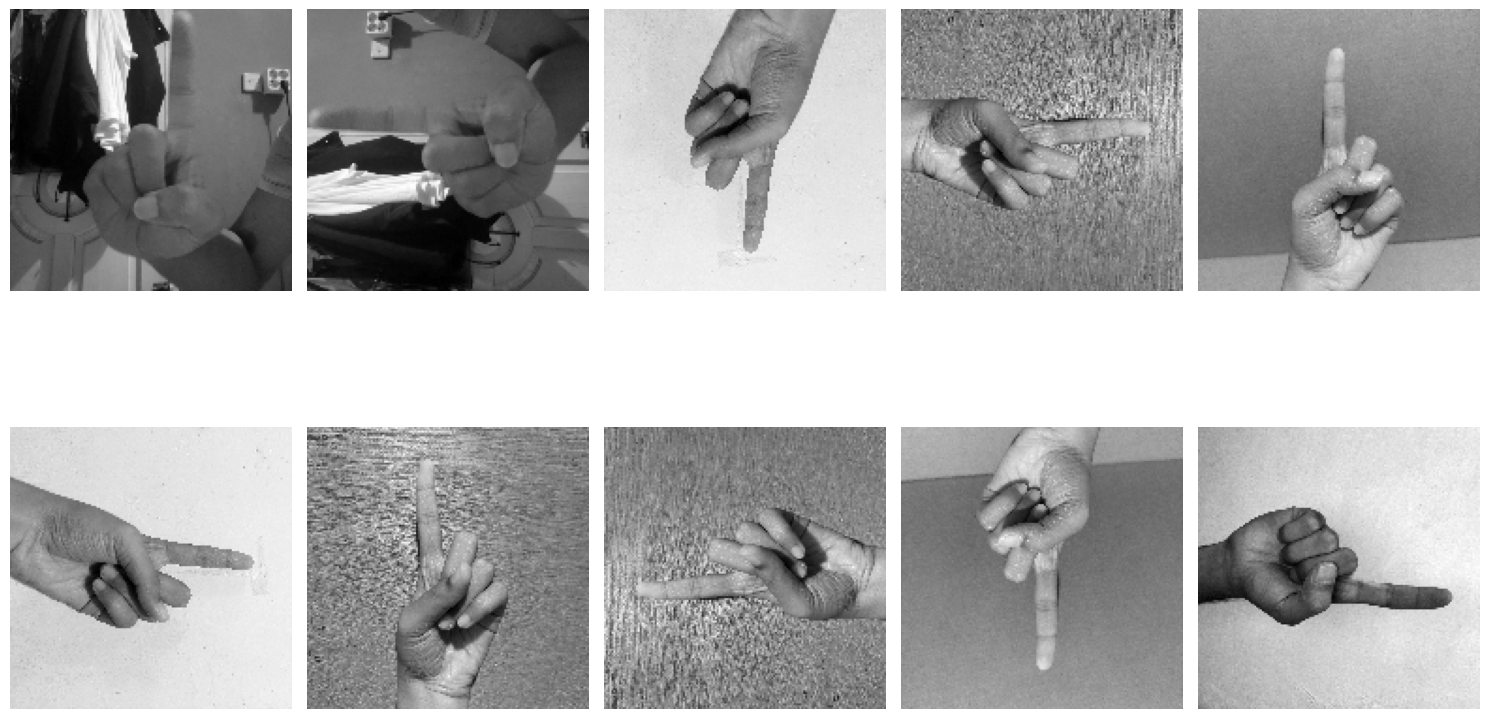

In [10]:
def plot_augmented_samples(data, sample_indices=[4, 7, 10, 13, 16]):
    num_samples = len(sample_indices)
    plt.figure(figsize=(15, 10))  
    
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('off')
        
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(data[idx + num_samples], cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_augmented_samples(augmented_data)

Dengan menggunakan panjang array `augmented_labels`, kita dapat mengetahui jumlah total gambar dalam dataset setelah proses augmentasi. Dengan mencetak nilai ini, kita dapat memberikan informasi tentang seberapa banyak dataset telah diperluas melalui augmentasi

In [11]:
print(f'Total Dataset Gambar Setelah Augmentasi: {len(augmented_labels)}')

Total Dataset Gambar Setelah Augmentasi: 8396


### **Preprocessing**

Preprocessing adalah tahap dimana gambar-gambar disiapkan agar siap digunakan dalam model. 

#### **Preprocessing Percobaan 4**

Pada proses ini dilakukan thresholding pada dataset yang telah di augmentasi. Thresholding digunakan untuk menyederhanakan representasi gambar, yang membantu dalam memfokuskan     perhatian pada fitur penting seperti tepi dan bentuk objek

In [12]:
def thresholding(image, threshold):
    thresholded_image = np.zeros_like(image)
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            if image[i, j] >= threshold:
                thresholded_image[i, j] = 255
            else:
                thresholded_image[i, j] = 0
                
    return thresholded_image


Fungsi `thresholding` melakukan iterasi melalui setiap piksel dalam gambar grayscale dan mengubah piksel tersebut menjadi putih (255) jika nilai intensitasnya di atas atau sama dengan ambang batas yang ditentukan, atau hitam (0) jika di bawah ambang batas, dengan tujuan untuk menyederhanakan gambar dan menyoroti fitur penting seperti tepi dan bentuk objek.

In [13]:
threshold_value = 128
thresholded_augmented_data = []
for img in augmented_data:
    thresholded_img = thresholding(img, threshold_value)
    thresholded_augmented_data.append(thresholded_img)

thresholded_augmented_data = np.array(thresholded_augmented_data)
thresholded_augmented_labels = augmented_labels

Kemudian terapkan teknik thresholding pada setiap gambar dalam dataset augmentasi dengan nilai ambang batas 128 untuk menyederhanakan gambar dengan menyoroti fitur penting, kemudian menyimpan hasilnya dalam array NumPy untuk mempermudah analisis dan pemrosesan selanjutnya.

Setelah itu, cetak jumlah total gambar dalam dataset setelah diterapkan teknik thresholding, untuk memastikan dan memverifikasi bahwa semua gambar dalam dataset augmentasi telah berhasil diproses sesuai dengan ekspektasi.

In [14]:
print(f'Total Dataset Gambar Setelah Thresholding: {len(thresholded_augmented_labels)}')

Total Dataset Gambar Setelah Thresholding: 8396


Coba tampilkan beberapa sampel gambar hasil augmentasi yang telah di thresholding untuk memverifikasi penerapan dari filter yang digunakan.

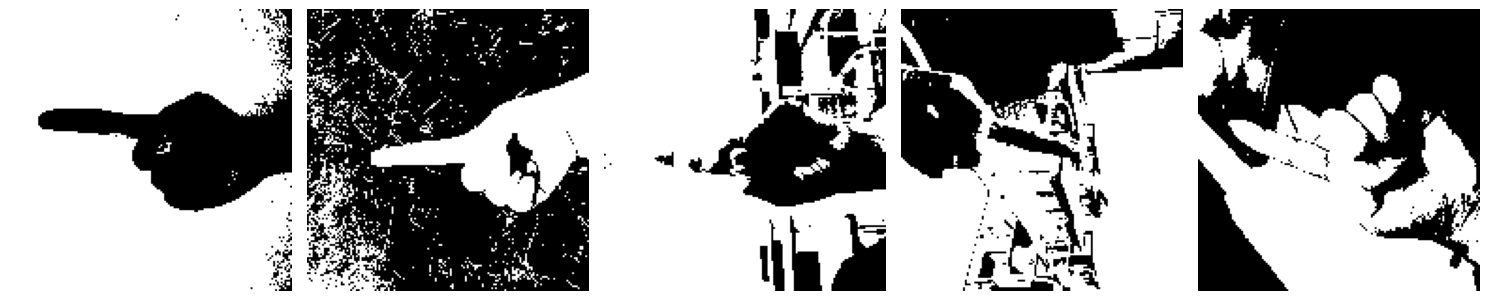

In [15]:
def plot_samples(data, sample_indices=[23, 111, 455, 477, 655]):
    num_samples = len(sample_indices)
    plt.figure(figsize=(15, 10))  
    
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_samples(thresholded_augmented_data)


#### **Preprocessing Tresholded**

Setelah melakukan thresholding pada dataset, diperlukan suatu proses lagi yaitu deteksi tepi untuk memudahkan dalam proses modeling. Operator Roberts dipilih karena merupakan salah satu metode deteksi tepi yang sederhana dan cepat.

In [16]:
def roberts_edge_detection(image):
    rows, cols = image.shape
    edge_image = np.zeros_like(image)

    kernel_x = np.array([[1, 0],
                         [0, -1]])

    kernel_y = np.array([[0, 1],
                         [-1, 0]])

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            gx = np.sum(kernel_x * image[i-1:i+1, j-1:j+1])
            gy = np.sum(kernel_y * image[i-1:i+1, j-1:j+1])
            edge_image[i, j] = np.sqrt(gx**2 + gy**2)

    edge_image[0, :] = 0
    edge_image[:, 0] = 0
    edge_image[rows-1, :] = 0
    edge_image[:, cols-1] = 0

    return edge_image

Fungsi `roberts_edge_detection_batch` digunakan untuk melakukan deteksi tepi pada seluruh dataset gambar yang telah di-threshold menggunakan operator Roberts. Pertama-tama, fungsi menginisialisasi kernel Roberts yang akan digunakan untuk proses konvolusi. Selanjutnya, fungsi melakukan deteksi tepi pada setiap gambar dalam dataset dengan menghitung konvolusi dengan kernel Roberts secara terpisah untuk mendapatkan gradien dalam arah-x dan arah-y, menghitung magnitudo gradien menggunakan gradien dalam kedua arah dan menyimpan hasil deteksi tepi ke dalam sebuah list.

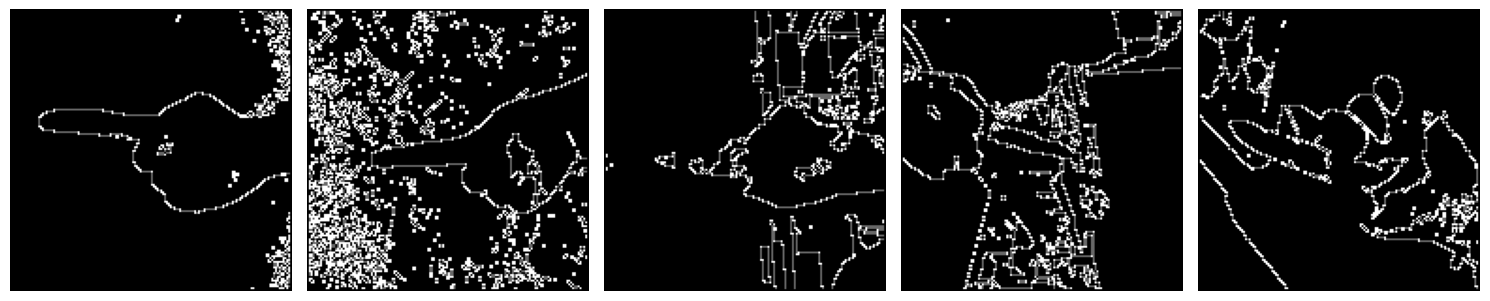

In [17]:
edge_images = [roberts_edge_detection(img) for img in thresholded_augmented_data ]
plot_samples(edge_images)

#### **Alasan Pemilihan Teknik dan Perlunya Preprocessing**

Dengan menggabungkan thresholding dan deteksi tepi, kita memastikan bahwa gambar yang digunakan untuk analisis dan modeling memiliki kualitas yang baik, dengan fitur yang lebih jelas dan terdefinisi, sehingga meningkatkan kinerja dan akurasi model secara keseluruhan.

### **Feature Extraction**

Feature extraction adalah proses mengekstraksi fitur atau karakteristik penting dari gambar yang akan digunakan oleh model untuk mengenali pola.

Pada tahap ini, kita akan melakukan ekstraksi fitur menggunakan metode Gray Level Co-occurrence Matrix (GLCM) pada dataset yang telah difilter dengan median filtering. Fitur-fitur yang akan dihitung meliputi Contrast, Dissimilarity, Homogeneity, Energy, Correlation, Entropy, dan ASM. Penghitungan GLCM akan dilakukan pada sudut 0, 45, 90, dan 135 derajat dengan jarak 1-5.

#### **1. Menghitung GLCM**

In [18]:
def calculate_glcm(image, distance, angle):
    height, width = image.shape
    glcm = np.zeros((256, 256), dtype=np.float64)
    dx, dy = {
        0: (0, distance),
        45: (-distance, distance),
        90: (-distance, 0),
        135: (-distance, -distance)
    }[angle]

    for i in range(height):
        for j in range(width):
            if 0 <= i + dx < height and 0 <= j + dy < width:
                glcm[image[i, j], image[i + dx, j + dy]] += 1

    glcm /= glcm.sum()
    return glcm

Fungsi `calculate_glcm` bertujuan untuk menghitung Gray Level Co-occurrence Matrix (GLCM) dari sebuah citra. Algoritma ini bekerja dengan menghitung frekuensi pasangan piksel dengan nilai keabuan tertentu yang muncul pada jarak (distance) dan sudut (angle) tertentu dalam citra. Pertama, matriks GLCM diinisialisasi dengan ukuran 256x256 (karena intensitas piksel bervariasi dari 0 hingga 255) dan diisi dengan nol. Berdasarkan sudut yang dipilih (0, 45, 90, atau 135 derajat), pergeseran piksel (dx, dy) ditentukan. Kemudian, untuk setiap piksel dalam citra, pasangan piksel yang sesuai (dengan pergeseran dx dan dy) diperiksa, dan frekuensi kemunculan pasangan tersebut dicatat dalam matriks GLCM. Setelah semua pasangan piksel diproses, matriks GLCM dinormalisasi dengan membagi setiap elemen dengan jumlah total pasangan untuk mendapatkan probabilitas relatif. 

#### **2. Menghitung Fitur**

In [19]:
def calculate_features(glcm):
    contrast = 0
    dissimilarity = 0
    homogeneity = 0
    energy = 0
    correlation = 0
    entropy = 0
    asm = 0
    mean_i = 0
    mean_j = 0
    std_i = 0
    std_j = 0

    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i - j) ** 2) * glcm[i, j]
            dissimilarity += abs(i - j) * glcm[i, j]
            homogeneity += glcm[i, j] / (1 + abs(i - j))
            energy += glcm[i, j] ** 2
            entropy -= glcm[i, j] * math.log2(glcm[i, j] + 1e-10)  # Adding a small constant to avoid log(0)
            mean_i += i * glcm[i, j]
            mean_j += j * glcm[i, j]
            asm += glcm[i, j] ** 2

    for i in range(rows):
        for j in range(cols):
            std_i += ((i - mean_i) ** 2) * glcm[i, j]
            std_j += ((j - mean_j) ** 2) * glcm[i, j]
            correlation += (i * j * glcm[i, j])

    std_i = np.sqrt(std_i)
    std_j = np.sqrt(std_j)
    correlation = (correlation - mean_i * mean_j) / (std_i * std_j + 1e-10)  # Adding a small constant to avoid division by zero

    return contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm

Fungsi `calculate_features` bertujuan untuk menghitung berbagai fitur tekstur dari matriks Gray Level Co-occurrence Matrix (GLCM) yang telah dihitung sebelumnya. Algoritma ini dimulai dengan menginisialisasi nilai-nilai fitur seperti kontras, dissimilarity, homogenitas, energi, korelasi, entropi, dan ASM (Angular Second Moment). Dalam dua loop bersarang, setiap elemen GLCM diakses untuk menghitung setiap fitur. Kontras mengukur perbedaan intensitas antara piksel dan tetangganya. Dissimilarity mengukur perbedaan absolut intensitas. Homogenitas mengukur kedekatan distribusi elemen dalam GLCM ke diagonal GLCM. Energi dan ASM mengukur keteraturan tekstur. Entropi mengukur ketidakpastian atau kekacauan dalam gambar. Korelasi mengukur seberapa jauh pasangan piksel berkorelasi satu sama lain. Setelah semua elemen dihitung, nilai rata-rata dan standar deviasi dihitung untuk korelasi. 

#### **3. Ekstraksi Fitur**

In [20]:
def extract_glcm_features(data, labels):
    distances = [1, 2, 3, 4, 5]
    angles = [0, 45, 90, 135]
    features = []

    for img, label in zip(data, labels):
        img_features = []
        for distance in distances:
            for angle in angles:
                glcm = calculate_glcm(img, distance, angle)
                contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm = calculate_features(glcm)
                img_features.extend([contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm])
        img_features.append(label)
        features.append(img_features)

    columns = []
    for distance in distances:
        for angle in angles:
            columns.extend([
                f'contrast_{angle}_{distance}',
                f'dissimilarity_{angle}_{distance}',
                f'homogeneity_{angle}_{distance}',
                f'energy_{angle}_{distance}',
                f'correlation_{angle}_{distance}',
                f'entropy_{angle}_{distance}',
                f'asm_{angle}_{distance}'
            ])
    columns.append('label')

    df = pd.DataFrame(features, columns=columns)
    return df

Fungsi `extract_glcm_features` bertujuan untuk mengekstrak fitur-fitur GLCM dari dataset gambar yang telah diolah sebelumnya. Algoritma ini bekerja dengan iterasi melalui setiap gambar dalam dataset bersama dengan labelnya. Untuk setiap gambar, jarak (distance) dan sudut (angle) yang telah ditentukan secara sebelumnya diiterasi. Untuk setiap kombinasi jarak dan sudut, GLCM dihitung menggunakan fungsi `calculate_glcm`, dan kemudian fitur-fitur GLCM seperti kontras, dissimilarity, homogenitas, energi, korelasi, entropi, dan ASM dihitung menggunakan fungsi `calculate_features`. Setelah semua fitur dihitung untuk satu gambar, mereka digabungkan ke dalam satu list yang mewakili fitur-fitur dari gambar tersebut. Selanjutnya, list fitur-fitur ini ditambahkan dengan label gambar dan dimasukkan ke dalam list fitur untuk semua gambar dalam dataset. Terakhir, DataFrame dibuat dari list fitur dengan kolom yang sesuai dengan setiap fitur dan label. 

#### **4. Penerapan pada Dataset**

In [21]:
edge_images_limit = edge_images[:100]
edge_images_limit_labels = thresholded_augmented_labels

Buat batasan pada dataset yang telah diproses dengan hanya mengambil 100 data pertama.

Kemudian ekstrak fitur GLCM dari 100 gambar pertama pada dataset dan cetak hasilnya. Setelah itu simpan hasilnya dalam format csv.

In [22]:
glcm_features_df = extract_glcm_features(edge_images_limit, edge_images_limit_labels)
print(glcm_features_df.head())
glcm_features_df.to_csv('glcm_percobaan_kedua.csv', index=False)

   contrast_0_1  dissimilarity_0_1  homogeneity_0_1  energy_0_1  \
0   2023.850917           9.584430         0.948909    0.873410   
1   1912.971902           8.829978         0.954897    0.877883   
2   1997.234720           9.474541         0.949399    0.874484   
3   1828.647248           8.427651         0.957075    0.882542   
4   1357.305503           7.190962         0.955141    0.894966   

   correlation_0_1  entropy_0_1   asm_0_1  contrast_45_1  dissimilarity_45_1  \
0         0.491615     0.539204  0.873410    2537.308590           11.692266   
1         0.524646     0.523799  0.877883    2629.613441           12.109725   
2         0.494669     0.535459  0.874484    2536.334219           11.682897   
3         0.532085     0.506406  0.882542    2522.371154           11.617044   
4         0.431535     0.454578  0.894966    1860.322148            9.409126   

   homogeneity_45_1  ...  entropy_90_5  asm_90_5  contrast_135_5  \
0          0.939339  ...      0.587767  0.854637

### **Feature Selection**

Pada tahap Feature Selection, kita bertujuan untuk memilih subset fitur yang paling relevan dan informatif dari fitur-fitur yang diekstraksi sebelumnya menggunakan GLCM. Memilih fitur-fitur yang paling penting dapat membantu meningkatkan kinerja model serta mengurangi dimensi data yang tidak relevan, yang dapat mempercepat proses pelatihan dan meminimalkan overfitting.

#### **Metode Feature Selection PCA**

Pemilihan teknik PCA dalam seleksi fitur dipilih karena dapat mengurangi dimensi data secara efisien sehingga waktu eksekusi program menjadi lebih cepat

#### Mengapa Hal Ini Penting?

Dengan mengurangi jumlah fitur, kita dapat mengurangi kompleksitas model dan menghindari overfitting. Fitur-fitur yang tidak relevan atau redundan dapat menyebabkan model "menghafal" data pelatihan dan gagal dalam generalisasi ke data uji.

Dengan menggunakan metode Principal Component Analysis (PCA) dari pustaka scikit-learn untuk mentransformasi fitur-fitur dalam DataFrame `glcm_features_df` menjadi ruang fitur yang lebih rendah dimensi dengan 10 komponen utama, kemudian mencetak rasio varians yang dijelaskan oleh setiap komponen.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  
pca.fit(glcm_features_df.drop('label', axis=1))
transformed_features = pca.transform(glcm_features_df.drop('label', axis=1))
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [9.85292132e-01 1.08562797e-02 2.03738449e-03 4.95211824e-04
 4.39827411e-04 2.49509023e-04 2.36621131e-04 1.47055166e-04
 1.05567889e-04 3.78483816e-05]


### **Splitting Data**

Dengan menggunakan fungsi `train_test_split` dari pustaka scikit-learn dataset akan dibagi menjadi data pelatihan dan data pengujian.

In [24]:
from sklearn.model_selection import train_test_split
X = glcm_features_df.drop('label', axis=1)
y = glcm_features_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))


Jumlah data pelatihan: 70
Jumlah data pengujian: 30


### **Normalization**

Normalisasi data adalah proses penting dalam pra-pemrosesan data untuk pembelajaran mesin. Tujuannya adalah untuk mengubah skala nilai-nilai fitur agar memiliki distribusi yang seragam, sehingga memudahkan proses pembelajaran mesin.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dengan menggunakan StandardScaler dari `scikit-learn` untuk normalisasi data, objek StandardScaler diinisialisasi. Kemudian, objek scaler dipasang pada data pelatihan untuk menghitung mean dan standar deviasi dari setiap fitur, dan data pelatihan diubah skelanya sehingga memiliki mean 0 dan standar deviasi 1. Selanjutnya, skala yang sama diterapkan pada data pengujian dengan menggunakan nilai mean dan standar deviasi yang sama dari data pelatihan. Dengan langkah-langkah ini, fitur-fitur dalam data dinormalisasi untuk memiliki distribusi yang seragam, meningkatkan performa algoritma machine learning.

## **Modeling**

#### Hyperparameter Tuning untuk Model K-Nearest Neighbors (KNN)

Pada tahap ini, dilakukan penyetelan hyperparameter pada model K-Nearest Neighbors (KNN) untuk meningkatkan kinerja klasifikasi. Proses ini melibatkan eksplorasi kombinasi hyperparameter yang berbeda dan evaluasi kinerja model menggunakan teknik validasi silang.

Langkah-langkahnya antara lain

1. Dalam model KNN, hyperparameter yang utama adalah jumlah tetangga (n_neighbors) dan metrik jarak yang digunakan (pilihan umumnya adalah 'euclidean', 'manhattan', atau 'minkowski'). Kita dapat memilih untuk mengoptimalkan kedua hyperparameter ini.

2. Kita perlu menentukan rentang nilai yang akan dieksplorasi untuk setiap hyperparameter. Misalnya, untuk n_neighbors, kita bisa mencoba nilai antara 1 hingga sejumlah tetangga maksimum yang mungkin. Sedangkan untuk metrik jarak, kita bisa mencoba beberapa metrik yang umum digunakan.

3. Kita dapat menggunakan teknik validasi silang untuk mengevaluasi kinerja model pada setiap kombinasi hyperparameter. Dalam validasi silang, dataset dibagi menjadi beberapa lipatan, dan model dievaluasi menggunakan beberapa kombinasi data pelatihan dan pengujian.
   
4. Ada dua pendekatan umum untuk mencari kombinasi hyperparameter terbaik: Grid Search dan Random Search.

   - Grid Search: Mencoba semua kombinasi hyperparameter yang mungkin dari rentang yang telah ditentukan.
   - Random Search: Mencoba kombinasi hyperparameter secara acak dari rentang yang telah ditentukan.
5. Setelah proses pencarian hyperparameter selesai, model dengan kinerja terbaik diukur menggunakan metrik evaluasi yang ditetapkan. Dalam kasus ini, akurasi dapat digunakan sebagai metrik evaluasi.

## **Evaluation**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="A single label was found in 'y_true' and 'y_pred'.*")

Classification Report:
              precision    recall  f1-score   support

    finger_1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[30]]
Accuracy: 1.0


c:\Users\iki_rhmn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Evaluasi model menunjukkan bahwa model KNN yang telah dibangun dapat dengan sempurna memprediksi kelas "finger_1" pada data pengujian. Ini tercermin dalam akurasi, precision, recall, dan f1-score yang semua mencapai nilai 1.0. Selain itu, matriks kebingungan hanya memiliki satu nilai non-nol, menunjukkan bahwa tidak ada kesalahan yang dibuat dalam klasifikasi.

Namun, penting untuk diingat bahwa evaluasi ini didasarkan pada dataset pengujian yang relatif kecil, hanya terdiri dari 30 sampel. Oleh karena itu, meskipun hasilnya sangat baik, ini mungkin tidak mencerminkan kinerja sebenarnya dari model di lingkungan produksi yang lebih besar dan beragam. Oleh karena itu, disarankan untuk melakukan pengujian model dengan dataset yang lebih besar dan bervariasi untuk mendapatkan gambaran yang lebih akurat tentang kinerja model di dunia nyata.